# K-Nearest Neighbor (최근접 이웃)
### - 예측 모델없이 최근접 값들을 기준으로 분류/회귀

In [220]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [221]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## KNN Classification

### Data 가져오기

In [222]:
a = load_iris                     
data = a()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [223]:
df = pd.DataFrame(data=data.data, columns = data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [224]:
df['Target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Train, Test Data 분리하기

In [225]:
def X_y(t):
    X, y = t(return_X_y=True)
    return X, y

In [226]:
X_y(a)

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [227]:
X, y = X_y(a)

In [228]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [229]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [231]:
print("총개수 : {0}, X_train 개수 : {1}, y_train 개수 : {2}, X_test 개수 : {3}".format(len(X), len(X_train), len(y_train), len(X_test)))

총개수 : 150, X_train 개수 : 120, y_train 개수 : 120, X_test 개수 : 30


### 전처리 (standardization)

In [232]:
scaler = StandardScaler()

In [233]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

### Model 적용

In [234]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("학습 데이터 점수 : {:2f}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {:2f}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.966667
평가 데이터 점수 : 1.000000


In [235]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)
print("학습 데이터 점수 : {:.2f}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {:.2f}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.95
평가 데이터 점수 : 1.00


### Cross Validate 검증

In [236]:
estimator = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [237]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    4.3s remaining:    2.8s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    4.4s finished


{'fit_time': array([0.00300121, 0.00301099, 0.00400996, 0.00400186, 0.00400305,
        0.00600505, 0.0080018 , 0.00400233, 0.00600696, 0.00400138]),
 'score_time': array([0.00399494, 0.00400043, 0.00299692, 0.00399971, 0.00500107,
        0.00499892, 0.0049963 , 0.01100016, 0.00399256, 0.00499773]),
 'test_score': array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
        0.93333333, 0.86666667, 1.        , 1.        , 1.        ])}

### 최적화 조건 검토

In [238]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsClassifier())])

In [239]:
param_grid = [{'model__n_neighbors':[3, 5, 7],
              'model__weights':['uniform', 'distance'],
              'model__algorithm':['ball_tree', 'kd_tree', 'brute']}]

In [240]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True)

In [241]:
gs.fit(X, y)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  90 out of  90 | elapsed:    0.2s finished


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [242]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7,
                                      weights='distance'))])

In [243]:
print("GridSearchCF best score : {:.4f}".format(gs.best_score_))

GridSearchCF best score : 0.9667


### 시각화

In [244]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    return xx, yy

def plot_contour(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [245]:
tsne = TSNE(n_components=2)   # 시각화를 위해 저차원(2차원)으로 변환
X_comp = tsne.fit_transform(X)

In [246]:
X_comp

array([[-21.004045 , -14.526096 ],
       [-23.692936 , -15.28625  ],
       [-23.434536 , -14.114828 ],
       [-23.90956  , -14.456369 ],
       [-20.981977 , -14.091088 ],
       [-18.99322  , -14.282743 ],
       [-23.1563   , -13.715652 ],
       [-21.681538 , -14.797671 ],
       [-24.657772 , -14.290014 ],
       [-23.174435 , -15.165003 ],
       [-19.455482 , -14.879909 ],
       [-22.36234  , -15.001432 ],
       [-23.929401 , -15.004719 ],
       [-24.682451 , -13.666748 ],
       [-18.12097  , -14.925005 ],
       [-17.969778 , -14.374293 ],
       [-18.839844 , -14.626745 ],
       [-20.934399 , -14.642179 ],
       [-18.650328 , -15.14305  ],
       [-19.934937 , -14.0793   ],
       [-20.067007 , -15.690796 ],
       [-20.204796 , -14.301434 ],
       [-22.806444 , -12.944977 ],
       [-21.405205 , -15.982623 ],
       [-22.364742 , -16.03896  ],
       [-23.294975 , -15.726225 ],
       [-21.530817 , -15.472482 ],
       [-20.5419   , -14.932676 ],
       [-20.888151 ,

In [247]:
X_comp[:,0]

array([-21.004045 , -23.692936 , -23.434536 , -23.90956  , -20.981977 ,
       -18.99322  , -23.1563   , -21.681538 , -24.657772 , -23.174435 ,
       -19.455482 , -22.36234  , -23.929401 , -24.682451 , -18.12097  ,
       -17.969778 , -18.839844 , -20.934399 , -18.650328 , -19.934937 ,
       -20.067007 , -20.204796 , -22.806444 , -21.405205 , -22.364742 ,
       -23.294975 , -21.530817 , -20.5419   , -20.888151 , -23.271162 ,
       -23.333138 , -20.135506 , -18.840454 , -18.292847 , -23.090887 ,
       -22.488354 , -19.525608 , -21.384706 , -24.494629 , -21.343792 ,
       -21.389975 , -25.220951 , -24.067781 , -21.115372 , -19.61405  ,
       -23.912657 , -19.870724 , -23.670988 , -19.714647 , -22.081568 ,
        14.164274 ,  12.692465 ,  14.554449 ,   7.590461 ,  13.199426 ,
         9.8139105,  13.031318 ,   6.041094 ,  13.226785 ,   7.568254 ,
         6.1756215,  10.1000185,   7.9961057,  11.968175 ,   7.341296 ,
        13.165228 ,   9.957807 ,   8.562559 ,  11.163363 ,   7.7

In [248]:
X_comp[:,1]

array([-14.526096 , -15.28625  , -14.114828 , -14.456369 , -14.091088 ,
       -14.282743 , -13.715652 , -14.797671 , -14.290014 , -15.165003 ,
       -14.879909 , -15.001432 , -15.004719 , -13.666748 , -14.925005 ,
       -14.374293 , -14.626745 , -14.642179 , -15.14305  , -14.0793   ,
       -15.690796 , -14.301434 , -12.944977 , -15.982623 , -16.03896  ,
       -15.726225 , -15.472482 , -14.932676 , -14.996599 , -14.694447 ,
       -15.1987915, -15.588116 , -13.822614 , -14.274989 , -15.134217 ,
       -14.21163  , -15.496364 , -13.81632  , -14.020776 , -14.929628 ,
       -14.181132 , -14.824155 , -13.626235 , -15.902117 , -13.498636 ,
       -14.994122 , -13.9886875, -14.106675 , -14.690901 , -14.64754  ,
         6.843859 ,   6.0131044,   6.464316 ,   5.516842 ,   5.944841 ,
         5.8823214,   5.3714314,   5.4318185,   6.4257183,   6.2511916,
         5.5632777,   5.4269686,   4.1603117,   5.0007205,   5.8272214,
         6.7573853,   6.2210455,   4.8842483,   3.427246 ,   5.0

In [249]:
comp_df = pd.DataFrame(data=X_comp)
comp_df["Target"] = y
comp_df

,0,1,Target
0,-21.004045,-14.526096,0
1,-23.692936,-15.286250,0
2,-23.434536,-14.114828,0
3,-23.909559,-14.456369,0
4,-20.981977,-14.091088,0
...,...,...,...
145,17.849588,4.700028,2
146,14.842282,3.632327,2
147,16.986471,4.442698,2
148,18.460205,5.416849,2


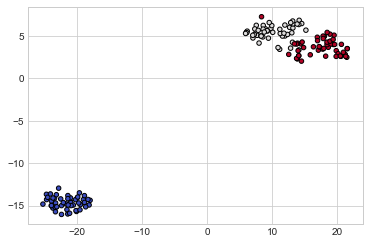

In [250]:
## 단순 시각화
plt.scatter(X_comp[:,0], X_comp[:,1],
           c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [251]:
## KNN을 통한 시각화

model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

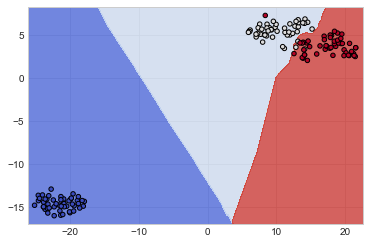

In [252]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contour(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');